<p id="top"></p> <br>

# OTHER VISUALISATION TOOLS TUTORIAL
<br> This notebook includes different visualisation tools examples which are used rarely. 

<ul>
    <li><a href="#1"> Matrix and Box Plot (missingno) </a></li>
    <li><a href="#2"> Parallel Plots (pandas) </a></li>
    <li><a href="#3"> Network Charts (networkx) </a></li>
    <li><a href="#4"> Venn Diagram (matplotlib) </a></li>
    <li><a href="#5"> Donut Plot (matplotlib) </a></li>
    <li><a href="#6"> Spyder Chart (matplotlib) </a></li>
    <li><a href="#7"> Cluster Map (seaborn) </a></li>
    <li><a href="#8"> Inset Plot (plotly) </a></li>
    <li><a href="#9"> 3D Plot (Plotly) </a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import parallel_coordinates

from math import pi

import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

<p id="1"></p> <br>

## Matrix and Box Plot (missingno)
* In data analysis, one of the first steps is cleaning messy datasets and missing values.
* In order to explore whether data has missign value or not, I always use .info() method from pandas library. It gives a lot of information.
* Visualization is always attractive for people. Therefore, if we can visualize missign values, it can be better understandable.
* In order to visualize missign data, we can use missigno package.
* Lets create pandas dataframe that includes missign values (NaN) and visualize it.
    * Dictionary: One of the methods of creating data frame is first creating dictionary then put it into pd.DataFrame
    * data_missingno: Data frame that we will use in this example
    * import missingno as msno: import missingno library and define as msno (shortcut)
    * matrix(): Create matrix. Number of rows is number of sample and number of columns is number of features(column1, column2, column3) in data_missingno.
    * show(): shows the plot
* The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.
* Missign values are white and non missign values are black in plot.
* It can be seen from plot column1 does not have missign value. Column2 has five missign values and column3 has three missign values.

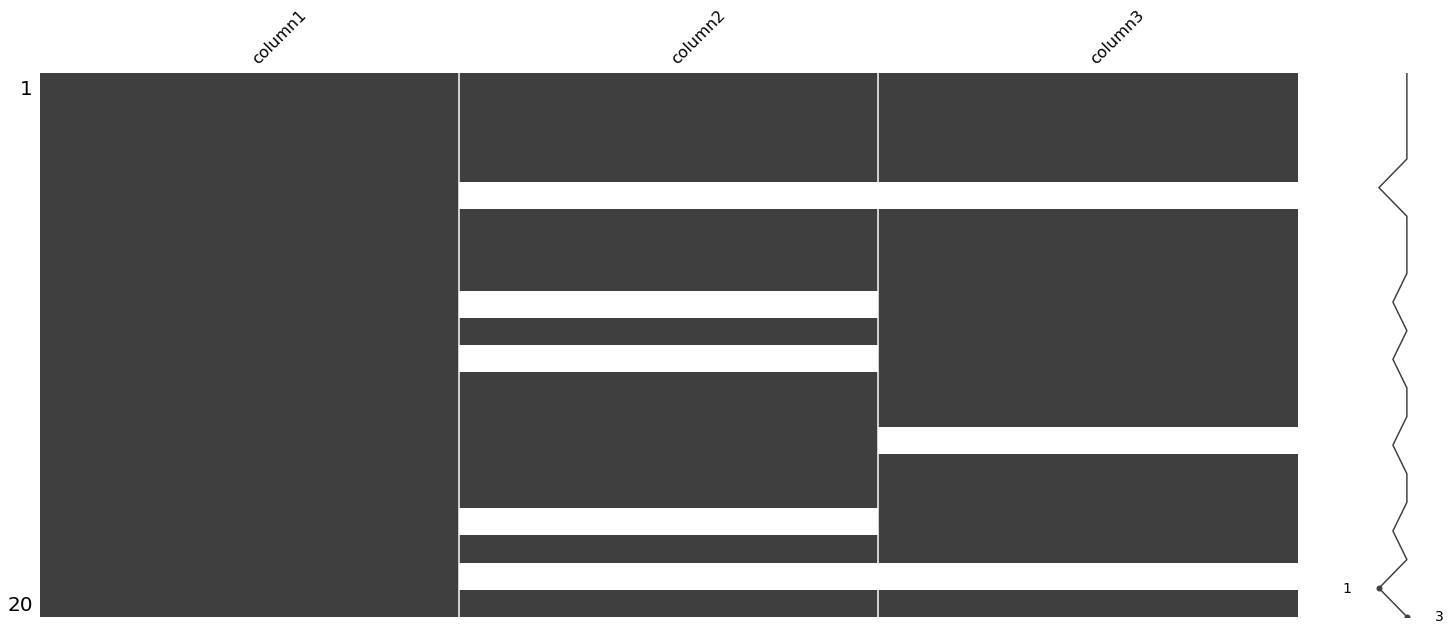

In [2]:
# Define dictionary
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}

# Create data frame from dictionary
data_missingno = pd.DataFrame(dictionary)

# import missingno library
import missingno as msno
msno.matrix(data_missingno)
plt.show()

# white boxes are missing values

* Apart from matrix plot we can use bar plot to observe missign values.
* Bar is a simple visualization of nullity by column.
* Numbers at left side of plot is percentage.
* Numbers at top of the plot is number of non missign values
* Numbers at right side of plot is number of sample in data.

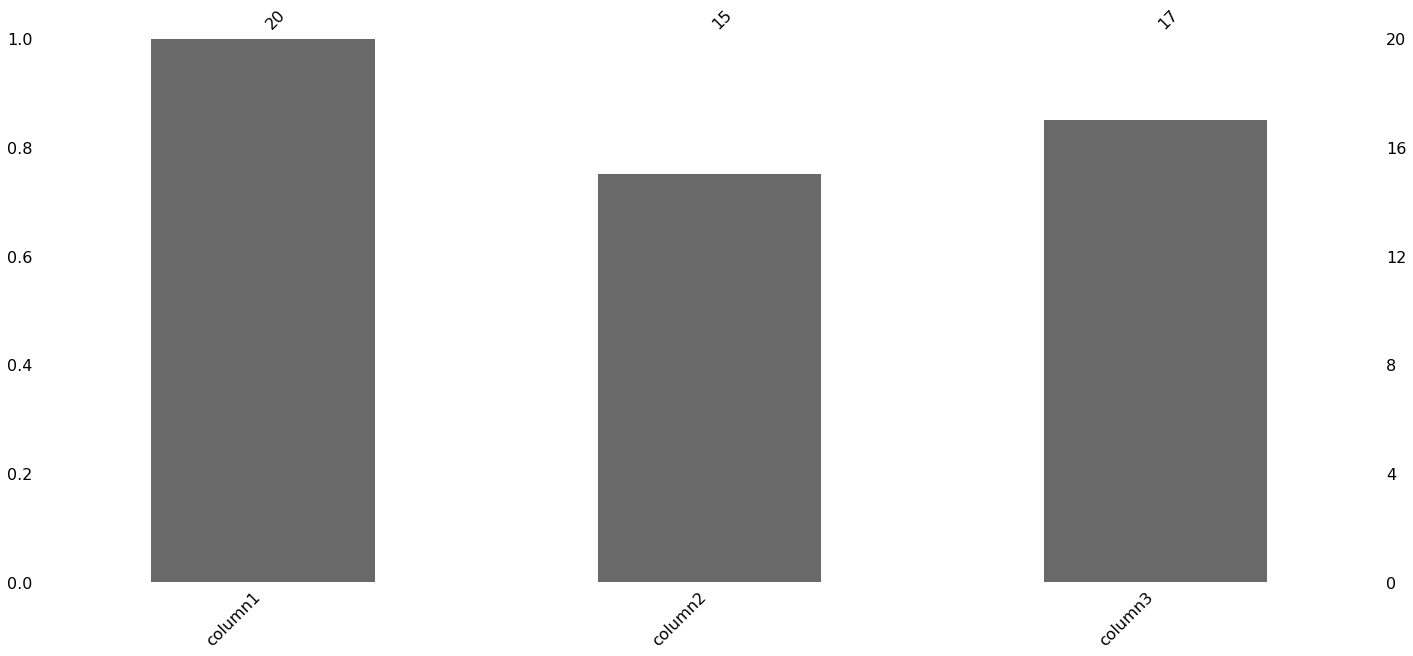

In [3]:
msno.bar(data_missingno)
plt.show()

* Additionally, we can use heapmap to observe missign values. Our data is not good example for heat map.
<br> You can find proper examples from references.
<br> References: https://github.com/ResidentMario/missingno
<br> https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

In [4]:
# msno.heatmap(data_missingno)
# plt.show()

<p id="2"></p> <br>

## Parallel Plots (pandas)

* In order to learn parallel plots, we will use iris data set
* Parallel plot allow to compare the feature of several individual observations on a set of numerical variables.
* Each vertical bar represents a feature(column or variable) like petal length (cm).
* Values are then plotted as series of lines connected across each axis.
* Different colors shows different classes like setosa.
* Parallel plot allow to detect interesting patterns. For example as you can see we can easily classify *setosa* according to *petal width (cm)* feature.
* Lets look at code.
    * Load iris data into data frame
    * parallel_coordinates: we import parallel_coordinates from pandas library
    * colormap: color map that paints classes with different colors

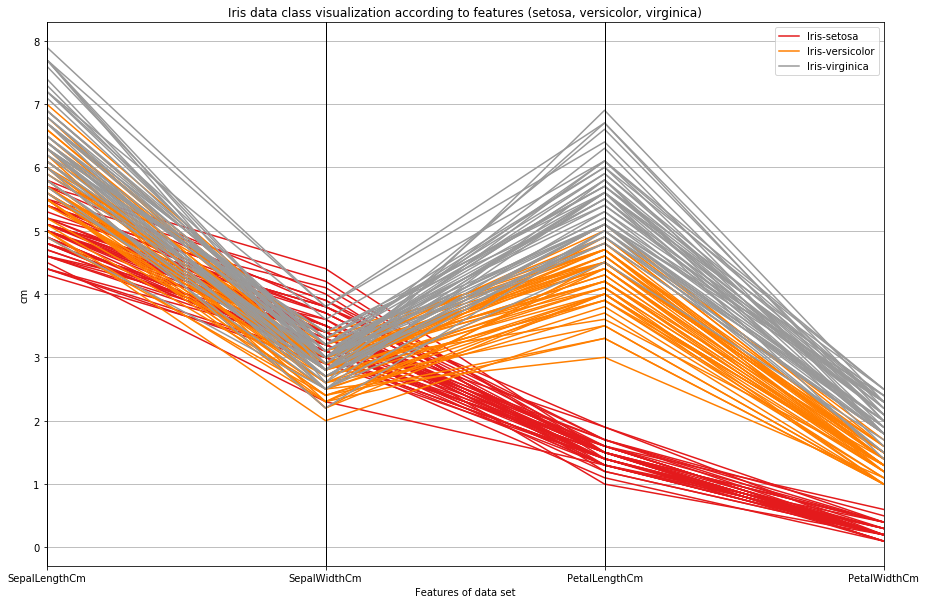

In [5]:
# load iris data
data = pd.read_csv("iris.csv")
data = data.drop(['Id'], axis=1)

# Visualisation
plt.figure(figsize=(15,10))
parallel_coordinates(data,'Species', colormap=plt.get_cmap('Set1')) # colormap=plt.get_cmap('Set1') is color pallette.
plt.title('Iris data class visualization according to features (setosa, versicolor, virginica)')
plt.xlabel('Features of data set')
plt.ylabel('cm')
plt.savefig('parallelPlot.png')
plt.show()

<p id="3"></p> <br>

## Network Charts (networkx)
* We will use iris data that we import at previous part( parallel plot)
* Network charts are related with correlation network.
* It can be used instead of heatmaps in seaborn library.
* At first look at correlation between features.
    * corr(): gives correlation between features
    * As you can see from table below, petal length is positively correlated with sepal length and petal width. Also, petal length is negatively correlated with sepal width.

In [6]:
# Calculate the correlation between individuals.

corr = data.iloc[:,0:4].corr()
corr

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

* We have 4 individuals(features), and know how close they are related to each other (above correlation table).
* It is possible to represent these relationships in a network
* Each individual called as a node. If 2 individuals(features like sepal length and sepal width) are close enough (threshold), then they are linked by a line.
    * threshold: threshold of the correlation. For example, if we say that threshold = 0.5, network will be established between the nodes that have higher correlation than 0.5
* I will put -1 that is default threshold value. min(cor(A,B))= -1 so all nodes are connected with each other.
* You can try threshold = 0.9, you will see that petal length and width are connected with each other.
* It is alternative to heatmap.
* As a final words of network charts, they can be used in data sets that are related with populations and their habits. Maybe,we can observe populations are clearly split in X groups according to their habits.
* Now lets look at our code with iris datasets.

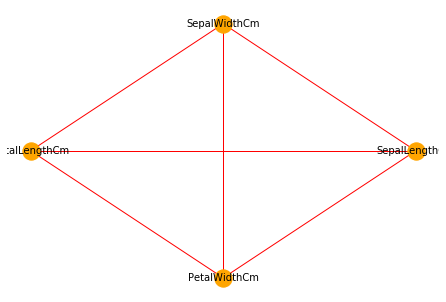

In [7]:
# import networkx library
import networkx as nx

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

# corrolation
threshold = -1

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered = links.loc[(links.value >= threshold)&(links.var1 != links.var2)]

# Build your graph
G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

# Plot the network
nx.draw_circular(G, with_labels= True, node_color='orange', node_size= 300, edge_color = 'red', linewidths = 1, font_size=10)

<a id="4"></a> <br>

## Venn Diagram (Matplotlib)

* You can use venn diagram to visualize the size of groups and their intersection.

In [8]:
data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

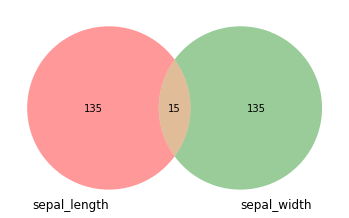

In [9]:
from matplotlib_venn import venn2

sepal_length = data.iloc[:, 0]
sepal_width = data.iloc[:, 1]
petal_length = data.iloc[:, 2]
petal_width = data.iloc[:, 3]

# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width')) 
# 15 is just an example of intersection
plt.show()

 <a id="5"></a> <br>
    
## Donut (Matplotlib)
* A donut chart is a pie chart with an area of the center cut out. 

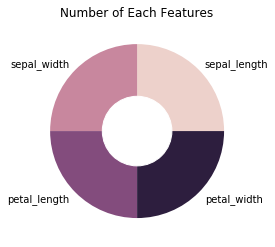

In [10]:
# donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]

# create a circle for the center of plot

circle = plt.Circle((0,0), 0.4, color='white')
plt.pie(feature_size, labels=feature_names, colors=sns.cubehelix_palette(4))
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Number of Each Features')
plt.show()

<a id="6"></a> <br>
    
## Spider Chart (Matplotlib)
* A spider(radar) plot  is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables.

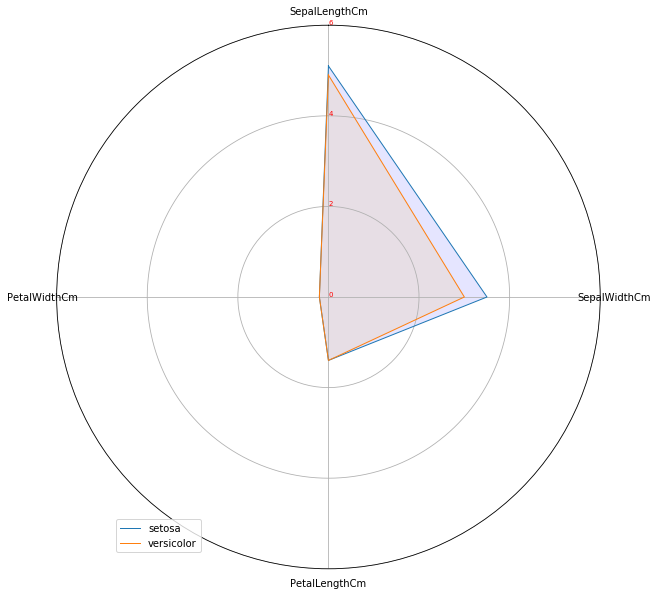

In [11]:
# spider graph
categories = list(data)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

<a id="7"></a> <br>

## Cluster Map (Seaborn)
* Plot a matrix dataset as a hierarchically-clustered heatmap.

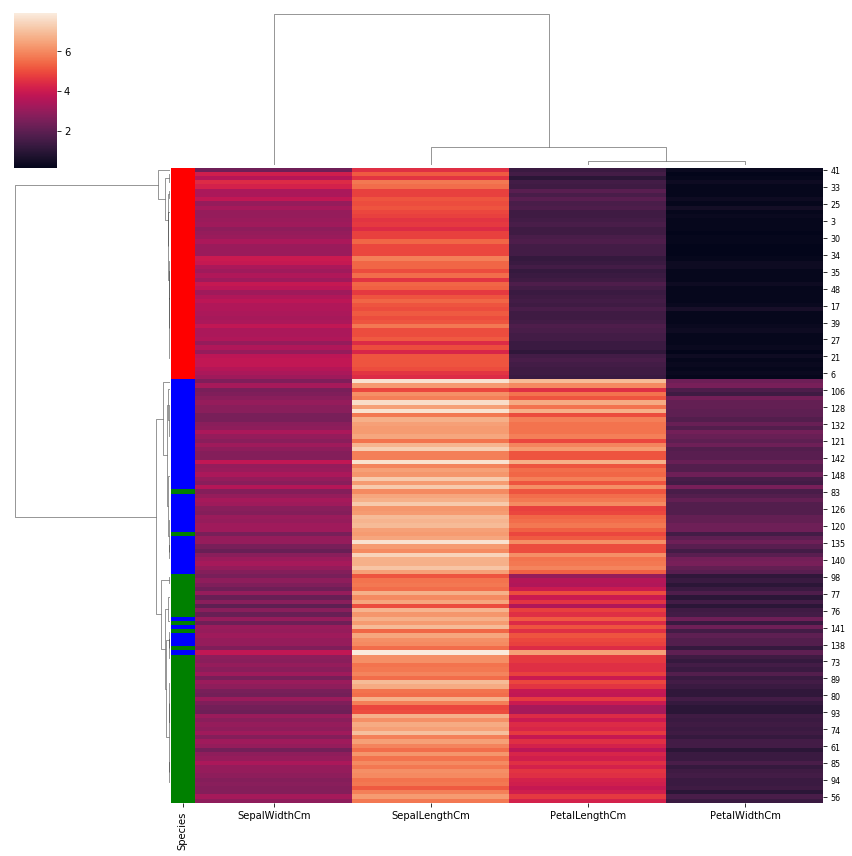

In [12]:
# cluster map (dendogram and tree)
df = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df1 = data.Species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

<a id="8"></a> <br>
## Inset Plots (Plotly)
* If you do not understand the code check my plotly tutorial.

In [13]:
# trace1 is line plot
# go: graph object
trace1 = go.Scatter(
    x=df.index,
    y=df.SepalLengthCm,
    mode = "markers",
    xaxis='x2',
    yaxis='y2',
    name = "SepalLengthCm",
    marker = dict(color = 'rgba(0, 112, 20, 0.8)'),
)

# trace2 is histogram
trace2 = go.Histogram(
    x=df.SepalLengthCm,
    opacity=0.75,
    name = "Sepal Length(Cm)",
    marker=dict(color='rgba(10, 200, 250, 0.6)'))

# add trace1 and trace2
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = ' Sepal Length(Cm) Histogram and Scatter Plot'
)
fig = go.Figure(data=data, layout=layout)
fig.show()

<a id="9"></a> <br>
## Basic 3D Scatter Plot (Plotly)
* import data again to avoid confusion
* go.Scatter3d: 3D scatter
* We will plot iris setosa and iris virginica classes according to their Sepal Length(x), Sepal Width(y), and Petal Length(z).

In [14]:
# import data again
data = pd.read_csv('iris.csv')

# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]

# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)


fig = go.Figure(data=data, layout=layout)
fig.show()

<p><a href="#top">This link goes to the top</a></p>